# ** Customer Segmentation Analysis**

# 1. problem statement

Customer segmentation is the problem of uncovering information about a firm's customer base, based on their interactions with the business.In most cases this interaction is in terms of their purchase behaviour and patterns. We explore some of the ways in which this can be used.

You own the mall and want to understand the customers like who can be easily converge(Target Customers)so that the sense can be given to marketing team and plan the strategy accordingly.

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

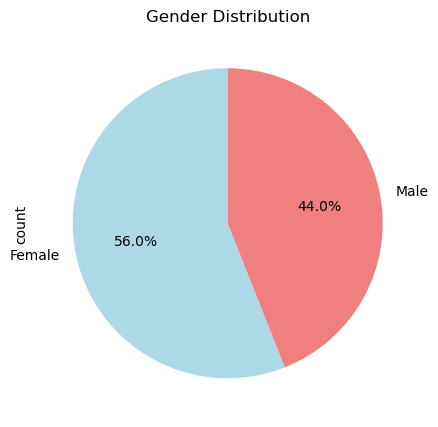

In [22]:
plt.figure(figsize=(5, 6))
df['Genre'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Gender Distribution')
plt.show()

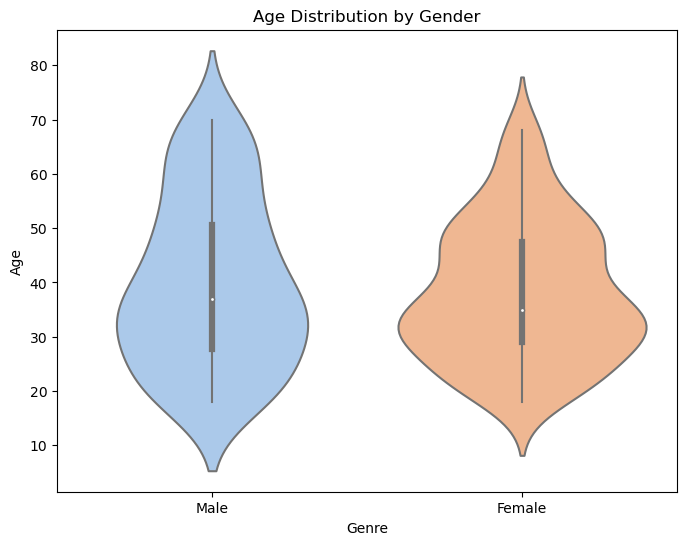

In [35]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Genre', y='Age', data=df, palette='pastel')
plt.title('Age Distribution by Gender')
plt.show()

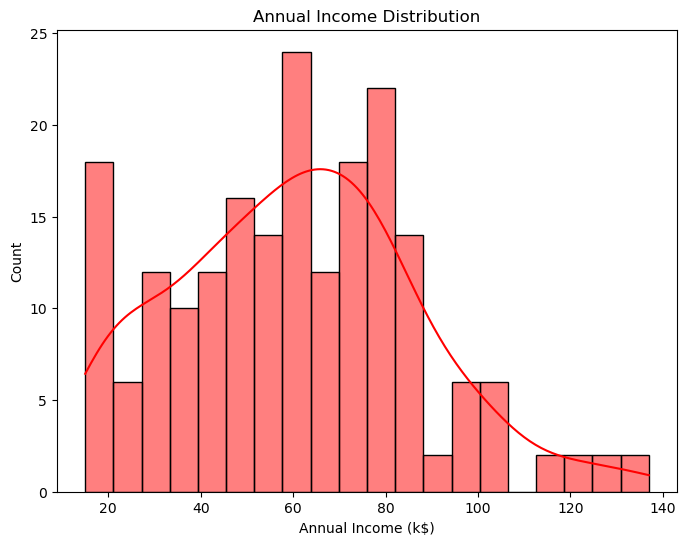

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.show()

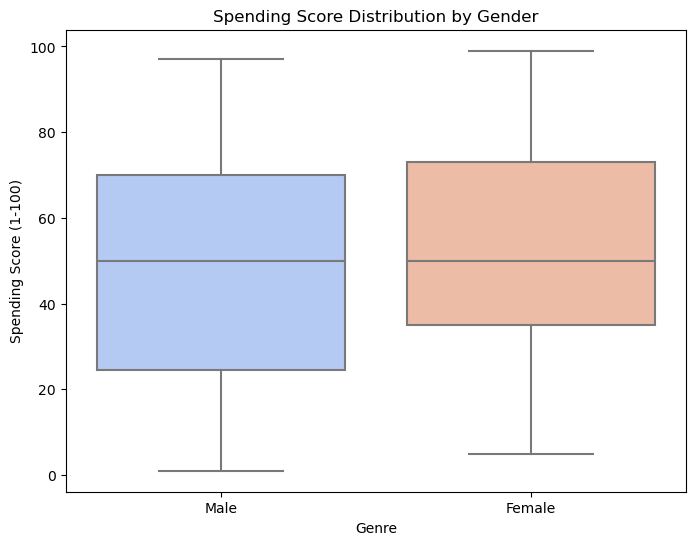

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df, palette='coolwarm')
plt.title('Spending Score Distribution by Gender')
plt.show()

In [41]:
duplicates = df.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


# Perform K-means Clustering

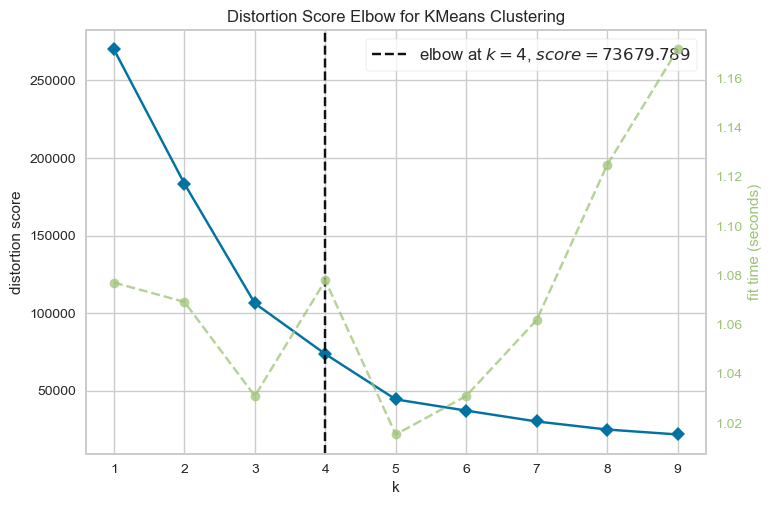

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
visualizer = KElbowVisualizer(KMeans(), k=(1, 10))
visualizer.fit(X)
visualizer.show()

In [57]:
k_clusters = 5
km = KMeans(n_clusters=k_clusters, random_state=42)
df['Clusters'] = km.fit_predict(X)


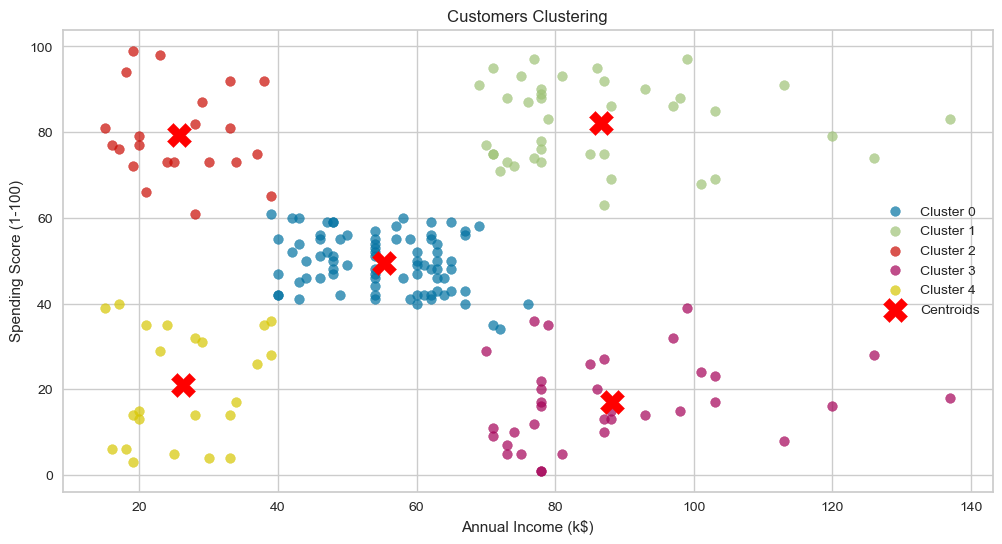

In [58]:
plt.figure(figsize=(12, 6))
for cluster in range(k_clusters):
    plt.scatter(X[df['Clusters'] == cluster]['Annual Income (k$)'],
                X[df['Clusters'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}', alpha=0.7)

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customers Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


# Model and Evaluation

In [60]:
X = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Clusters']

In [62]:
LE = LabelEncoder()
X['Genre'] = LE.fit_transform(X['Genre'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

# XGBoost model

In [66]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=k_clusters, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=5,
              num_parallel_tree=None, ...)

In [67]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [68]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.00%


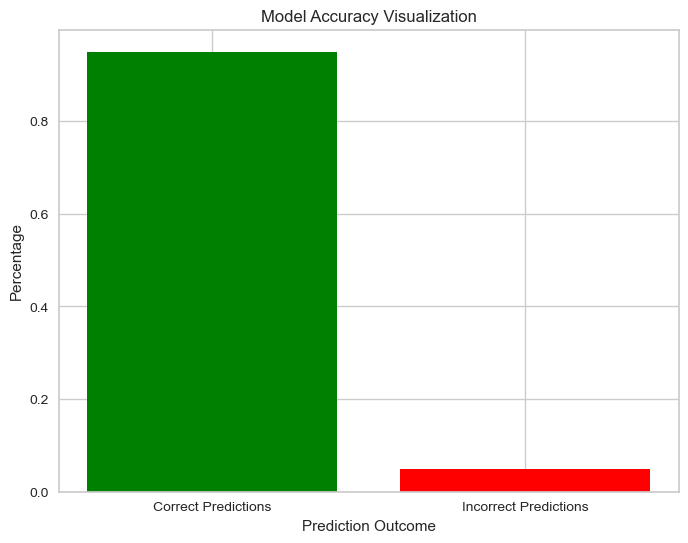

In [69]:
plt.figure(figsize=(8, 6))
accuracies = [accuracy, 1 - accuracy]  # Accuracy and error
labels = ['Correct Predictions', 'Incorrect Predictions']

plt.bar(labels, accuracies, color=['green', 'red'])
plt.title('Model Accuracy Visualization')
plt.xlabel('Prediction Outcome')
plt.ylabel('Percentage')
plt.show()

In [70]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[17,  0,  0,  1,  0],
       [ 0,  5,  0,  0,  0],
       [ 0,  1,  2,  0,  0],
       [ 0,  0,  0, 11,  0],
       [ 0,  0,  0,  0,  3]], dtype=int64)

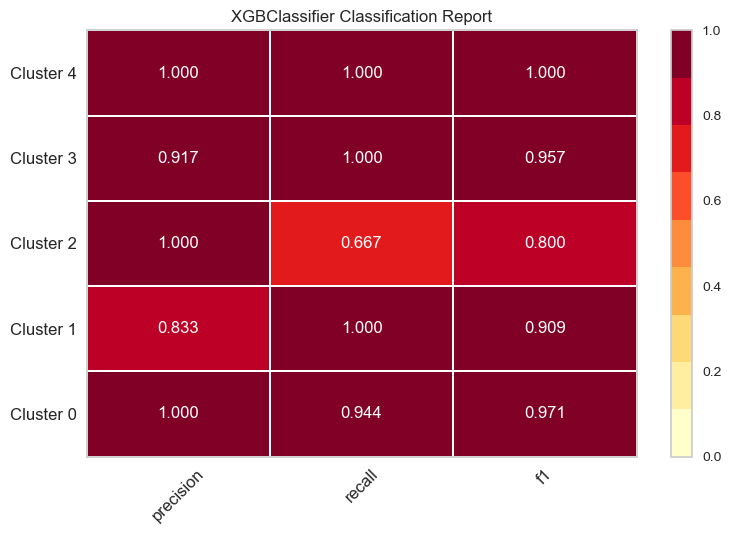

<Axes: title={'center': 'XGBClassifier Classification Report'}>

In [72]:
cr = ClassificationReport(model, classes=[f'Cluster {i}' for i in range(k_clusters)])
cr.fit(X_train, y_train)
cr.score(X_test, y_test)
cr.show()

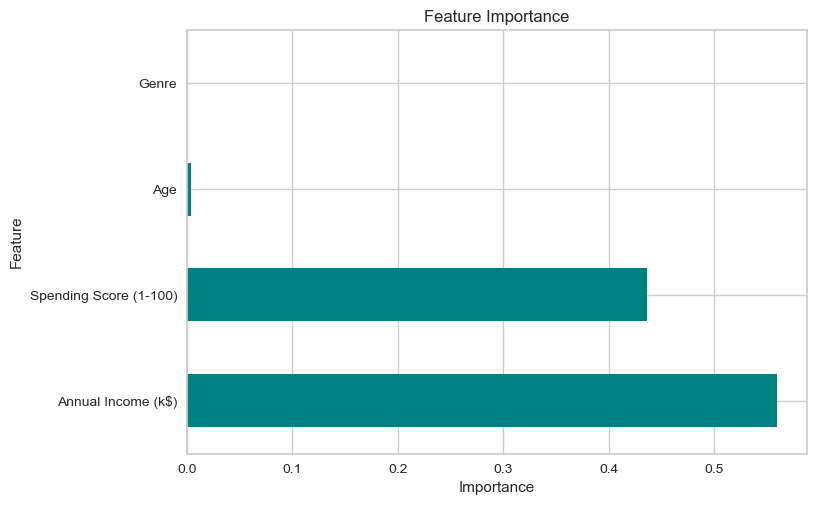

In [74]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='barh', color='teal')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()